# • DOMAIN: Smartphone, Electronics

# • CONTEXT: India is the second largest market globally for smartphones after China. About 134 million smartphones were sold across India in the year 2017 and is estimated to increase to about 442 million in 2022. India ranked second in the average time spent on mobile web by smartphone users across Asia Pacific. The combination of very high sales volumes and the average smartphone consumer behaviour has made India a very attractive market for foreign vendors. As per Consumer behaviour, 97% of consumers turn to a search engine when they are buying a product vs. 15% who turn to social media. If a seller succeeds to publish smartphones based on user’s behaviour/choice at the right place, there are 90% chances that user will enquire for the same. This Case Study is targeted to build a recommendation system based on individual consumer’s behaviour or choice.

# • DATA DESCRIPTION:
    • author : name of the person who gave the rating
    • country : country the person who gave the rating belongs to
    • data : date of the rating
    • domain: website from which the rating was taken from
    • extract: rating content
    • language: language in which the rating was given
    • product: name of the product/mobile phone for which the rating was given
    • score: average rating for the phone
    • score_max: highest rating given for the phone
    • source: source from where the rating was taken

# • PROJECT OBJECTIVE: We will build a recommendation system using popularity based and collaborative filtering methods to recommend mobile phones to a user which are most popular and personalised respectively.

# 1. Import the necessary libraries and read the provided CSVs as a data frame and perform the below steps.

# A. Merge all the provided CSVs into one dataFrame.

In [1]:
# IMPORT ALL THE NECESSARY LIBRARIES:

import numpy as np
import pandas as pd
from math import*

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from collections import defaultdict
from surprise import Reader
from surprise import accuracy
from surprise import Dataset
from surprise import KNNWithMeans
from surprise import SVD
from surprise.model_selection import train_test_split
from surprise.model_selection import cross_validate

from scipy.linalg import svd

from rake_nltk import Rake

import warnings
warnings.filterwarnings('ignore')

In [2]:
# IMPORT ALL THE 6 FILES AND ASSIGN THEM TO A VARIABLES DF_1 TO DF_6

DF_1 = pd.read_csv("phone_user_review_file_1.csv",encoding='iso-8859-1')
DF_2 = pd.read_csv("phone_user_review_file_2.csv",encoding='iso-8859-1')
DF_3 = pd.read_csv("phone_user_review_file_3.csv",encoding='iso-8859-1')
DF_4 = pd.read_csv("phone_user_review_file_4.csv",encoding='iso-8859-1')
DF_5 = pd.read_csv("phone_user_review_file_5.csv",encoding='iso-8859-1')
DF_6 = pd.read_csv("phone_user_review_file_6.csv",encoding='iso-8859-1')

In [3]:
print('COLUMNS PRESENT IN ALL THE DATA FRAMES:\n\n')

print('COLUMNS IN DF_1\n',DF_1.columns,
      '\n\nCOLUMNS IN DF_2\n',DF_2.columns,
      '\n\nCOLUMNS IN DF_3\n',DF_3.columns,
      '\n\nCOLUMNS IN DF_3\n',DF_3.columns,
      '\n\nCOLUMNS IN DF_4\n',DF_4.columns,
      '\n\nCOLUMNS IN DF_5\n',DF_5.columns,
      '\n\nCOLUMNS IN DF_6\n',DF_6.columns)

print('\n\n')

print(' NO OF ROWS AND COLUMNS IN EACH DATA SET:\n\n')

print(' ROWS IN DF_1:',DF_1.shape[0], '   COLUMNS IN DF_1:',DF_1.shape[1],'\n',
      'ROWS IN DF_2:',DF_2.shape[0], '   COLUMNS IN DF_2:',DF_2.shape[1],'\n',
      'ROWS IN DF_3:',DF_3.shape[0], '   COLUMNS IN DF_3:',DF_3.shape[1],'\n',
      'ROWS IN DF_4:',DF_4.shape[0], '    COLUMNS IN DF_4:',DF_4.shape[1],'\n',
      'ROWS IN DF_5:',DF_5.shape[0], '   COLUMNS IN DF_5:',DF_5.shape[1],'\n',
      'ROWS IN DF_6:',DF_6.shape[0], '   COLUMNS IN DF_6:',DF_6.shape[1],'\n')

COLUMNS PRESENT IN ALL THE DATA FRAMES:


COLUMNS IN DF_1
 Index(['phone_url', 'date', 'lang', 'country', 'source', 'domain', 'score',
       'score_max', 'extract', 'author', 'product'],
      dtype='object') 

COLUMNS IN DF_2
 Index(['phone_url', 'date', 'lang', 'country', 'source', 'domain', 'score',
       'score_max', 'extract', 'author', 'product'],
      dtype='object') 

COLUMNS IN DF_3
 Index(['phone_url', 'date', 'lang', 'country', 'source', 'domain', 'score',
       'score_max', 'extract', 'author', 'product'],
      dtype='object') 

COLUMNS IN DF_3
 Index(['phone_url', 'date', 'lang', 'country', 'source', 'domain', 'score',
       'score_max', 'extract', 'author', 'product'],
      dtype='object') 

COLUMNS IN DF_4
 Index(['phone_url', 'date', 'lang', 'country', 'source', 'domain', 'score',
       'score_max', 'extract', 'author', 'product'],
      dtype='object') 

COLUMNS IN DF_5
 Index(['phone_url', 'date', 'lang', 'country', 'source', 'domain', 'score',
       'score_m

    * ALL THE DATA SETS CONTAINS 11 COLUMNS
    
    * WE CAN SEE THAT ALL THE DATA SETS HAVE SAME COLUMNS.
    
    * LET US CONCAT ALL THE DATA SETS INTO A SINGLE ONE.

In [4]:
# WE WILL MERGE ALL THE DATA SETS INTO A SINGLE DATA SET DF

DF = pd.concat([DF_1, DF_2, DF_3, DF_4, DF_5, DF_6], ignore_index = True)

In [5]:
# CREATE A BACK UP OF ORIGINAL DATA FRAME.

BACKUP_DF = DF.copy()

In [6]:
print('COLUMNS PRESENT IN THE MERGED DATA FRAME:\n\n')

print('COLUMNS IN DF\n',DF.columns)

print('\n\n')

print(' NO OF ROWS AND COLUMNS IN MERGED DATA SET:\n\n')

print('ROWS IN DF:',DF.shape[0], '\n\nCOLUMNS IN DF:',DF.shape[1],'\n')

COLUMNS PRESENT IN THE MERGED DATA FRAME:


COLUMNS IN DF
 Index(['phone_url', 'date', 'lang', 'country', 'source', 'domain', 'score',
       'score_max', 'extract', 'author', 'product'],
      dtype='object')



 NO OF ROWS AND COLUMNS IN MERGED DATA SET:


ROWS IN DF: 1415133 

COLUMNS IN DF: 11 



In [7]:
print(DF.head())

                        phone_url       date lang country            source  \
0  /cellphones/samsung-galaxy-s8/   5/2/2017   en      us  Verizon Wireless   
1  /cellphones/samsung-galaxy-s8/  4/28/2017   en      us       Phone Arena   
2  /cellphones/samsung-galaxy-s8/   5/4/2017   en      us            Amazon   
3  /cellphones/samsung-galaxy-s8/   5/2/2017   en      us           Samsung   
4  /cellphones/samsung-galaxy-s8/  5/11/2017   en      us  Verizon Wireless   

                domain  score  score_max  \
0  verizonwireless.com   10.0       10.0   
1       phonearena.com   10.0       10.0   
2           amazon.com    6.0       10.0   
3          samsung.com    9.2       10.0   
4  verizonwireless.com    4.0       10.0   

                                             extract       author  \
0  As a diehard Samsung fan who has had every Sam...   CarolAnn35   
1  Love the phone. the phone is sleek and smooth ...    james0923   
2  Adequate feel. Nice heft. Processor's still sl... 

In [8]:
print(DF.tail())

                                 phone_url       date lang country source  \
1415128  /cellphones/alcatel-ot-club_1187/  5/12/2000   de      de   Ciao   
1415129  /cellphones/alcatel-ot-club_1187/  5/11/2000   de      de   Ciao   
1415130  /cellphones/alcatel-ot-club_1187/   5/4/2000   de      de   Ciao   
1415131  /cellphones/alcatel-ot-club_1187/   5/1/2000   de      de   Ciao   
1415132  /cellphones/alcatel-ot-club_1187/  4/25/2000   de      de   Ciao   

          domain  score  score_max  \
1415128  ciao.de    2.0       10.0   
1415129  ciao.de   10.0       10.0   
1415130  ciao.de    2.0       10.0   
1415131  ciao.de    8.0       10.0   
1415132  ciao.de    2.0       10.0   

                                                   extract        author  \
1415128  Weil mein Onkel bei ALcatel arbeitet habe ich ...    david.paul   
1415129  Hy Liebe Leserinnen und Leser!! Ich habe seit ...  Christiane14   
1415130  Jetzt hat wohl Alcatell gedacht ,sie machen wa...    michaelawr   
1415

    * MERGED DATA SET DF CONTAINS 11 COLUMNS AND 141533 ROWS.

# B. Explore, understand the Data and share at least 2 observations.

In [9]:
# INFO REGARDING THE MERGED DATA FRAME DF

print(DF.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1415133 entries, 0 to 1415132
Data columns (total 11 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   phone_url  1415133 non-null  object 
 1   date       1415133 non-null  object 
 2   lang       1415133 non-null  object 
 3   country    1415133 non-null  object 
 4   source     1415133 non-null  object 
 5   domain     1415133 non-null  object 
 6   score      1351644 non-null  float64
 7   score_max  1351644 non-null  float64
 8   extract    1395772 non-null  object 
 9   author     1351931 non-null  object 
 10  product    1415132 non-null  object 
dtypes: float64(2), object(9)
memory usage: 118.8+ MB
None


In [10]:
# PRINT CHARACTERISTICS OF THE MERGED DATA FRAME DF

print(DF.describe())

              score  score_max
count  1.351644e+06  1351644.0
mean   8.007060e+00       10.0
std    2.616121e+00        0.0
min    2.000000e-01       10.0
25%    7.200000e+00       10.0
50%    9.200000e+00       10.0
75%    1.000000e+01       10.0
max    1.000000e+01       10.0


In [11]:
# CHECK FOR THE PRESENCE OF ANY NULL VALUES IN THE DATA FRAME

print('LET US SEE WHETHER THERE ARE ANY NULL VALUES IN THE DATA:\n\n')

print(DF.isna().sum())

LET US SEE WHETHER THERE ARE ANY NULL VALUES IN THE DATA:


phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score        63489
score_max    63489
extract      19361
author       63202
product          1
dtype: int64


In [12]:
# CHECK THE UNIQUE VALUES IN THE DATA FRAME DF

print('LET US SEE ABOUT THE UNIQUE VALUES IN THE DATA FRAME:\n\n')

print(DF.nunique())

LET US SEE ABOUT THE UNIQUE VALUES IN THE DATA FRAME:


phone_url       5556
date            7728
lang              22
country           42
source           331
domain           384
score             86
score_max          1
extract      1321353
author        801103
product        61313
dtype: int64


In [13]:
# LANG COLUMN HAS 22 UNIQUE VALUES. LET US SEE HOW MANY USERS ARE PRESENT IN THE EACH LANG TYPE

print('NO OF USERS IN EACH LANGUAGE CATEGORY:\n\n')

print(DF['lang'].value_counts())

NO OF USERS IN EACH LANGUAGE CATEGORY:


en    554746
ru    207443
de    176600
it    116120
es     99739
fr     95080
pt     67155
nl     38375
tr     28359
sv     17149
fi      6953
cs      2533
no      1918
he      1370
pl       493
da       418
hu       346
id       271
ja        33
zh        19
ar        12
ko         1
Name: lang, dtype: int64


In [14]:
# LET US SEE HOW MANY USERS ARE PRESENT IN THE EACH COUNTRY

print('NO OF USERS IN EACH COUNTRY CATEGORY:\n\n')

print(DF['country'].value_counts())

NO OF USERS IN EACH COUNTRY CATEGORY:


us    318435
de    176525
ru    174945
in    127876
it    116120
gb     95795
fr     95080
es     76271
br     63975
ua     32498
tr     28359
nl     25716
se     17149
ar     15636
be     12659
ca     11118
fi      6953
pt      3180
mx      3142
cz      2533
no      1918
ec      1478
au      1413
il      1370
co      1350
uy       725
cl       603
pl       493
dk       418
ve       389
hu       346
id       271
pe       145
ch        75
nz        74
jp        33
za        25
tw        14
ae        12
sg        10
cn         5
kr         1
Name: country, dtype: int64


In [15]:
print('TOP TEN MOBILE PHONES AS PER NO OF USERS REVIEWED:\n\n')

print(DF['product'].value_counts(ascending = False)[:10])

TOP TEN MOBILE PHONES AS PER NO OF USERS REVIEWED:


Lenovo Vibe K4 Note (White,16GB)       5226
Lenovo Vibe K4 Note (Black, 16GB)      4390
OnePlus 3 (Graphite, 64 GB)            4103
OnePlus 3 (Soft Gold, 64 GB)           3563
Huawei P8lite zwart / 16 GB            2707
Samsung Galaxy Express I8730           2686
Lenovo Vibe K5 (Gold, VoLTE update)    2534
Samsung Galaxy S6 zwart / 32 GB        2345
Nokia 5800 XpressMusic                 2125
Lenovo Vibe K5 (Grey, VoLTE update)    2108
Name: product, dtype: int64


In [16]:
print('BOTTOM TEN MOBILE PHONES AS PER NO OF USERS REVIEWED:\n\n')

print(DF['product'].value_counts(ascending = True)[:10])

BOTTOM TEN MOBILE PHONES AS PER NO OF USERS REVIEWED:


HTC Desire 601 - 8GB - Black Smartphone                                                                                                       1
elephone S3 Smartphone 4G 5.2 "Android 6.0 Octa Core All-metal Dual Cameras Multi-funzione E-touch Fingerprint Quick Charge Cable Righello    1
Elephone ÐÐ¾Ð±Ð¸Ð»ÑÐ½ÑÐ¹ ÑÐµÐ»ÐµÑÐ¾Ð½ Elephone S3                                                                                        1
LG KP110 CEP TELEFONU                                                                                                                         1
Elephone S3 3GB/16GB 4G Dorado Libre                                                                                                          1
Elephone S3 3GB/16GB 4G Plata Libre Reacondicionado                                                                                           1
Elephone S3 3GB/16GB 4G Negro Libre                                             

In [17]:
# CHECK FOR THE NUMBER OF DUPILICATE ROWS PRESENT IN THE DATA:

print('NO OF DUPLUCATE ROWS PRESENT IN THE DATA: ',DF.duplicated().sum())

NO OF DUPLUCATE ROWS PRESENT IN THE DATA:  6412


    * SCORE AND SCORE_MAX ARE ONLY NUMERIC COLUMNS IN THE DATA AND ALL OTHER COLUMNS ARE OBJECT DATA TYPE.
    
    * MIN AND MAX FOR SCORE_MAX IS 10 AND THERE IS NO STANDARD DEVIATION.
    
    * THERE ARE PRESENSE OF NULL VALUES IN SCORE, SCORE_MAX, EXTRACT, AUTHOR AND PRODUCT
    
    * THERE ARE 6412 DUPLICATE RECORDS IN THE DATA.
    
    * SCORE MAX HAS ONLY 1 UNIQUE VALUE. EXTRACT HAS MOST NUMBER OF UNIQUE VALUES IN THE DATA
    
    * NEARLY 40% PERCENT OF PHONE USERS ARE ENG LANGUAGE USERS
    
    * MORE THAN 20% OF THE PHONE USERS ARE FROM US COUNTRY.
    
    * LENOVO VIBE K4 NOTE WITH BOTH WHITE AND BLACK VARIANTS ARE TOP REVIEWED PHONES FOLLOWED BY ONEPLUS 3
    
    * HTC, ELEPHONE AND SONY PHONES HAVE SOLD ONLY 1 PHONES AND ARE AT BOTTOM POSITION.

# C. Round off scores to the nearest integers.

In [18]:
DF['score'] = DF['score'].round(0).astype('Int64')

In [19]:
print('VALUES OF SCORE AFTER ROUNDED OFF TO NEAREST INTEGER:\n',DF['score'].unique())

VALUES OF SCORE AFTER ROUNDED OFF TO NEAREST INTEGER:
 <IntegerArray>
[10, 6, 9, 4, 8, 2, 7, 5, <NA>, 3, 1, 0]
Length: 12, dtype: Int64


    * WE HAVE ROUNDED OFF THE VALUES OF SCORE TO NEAREST INTEGERS.
    
    * WE COULD SEE THE SCORE RANGES FROM 0 TO 10.
    
    * THERE ARE ALSO NULL VALUES PRESENT IN THE SCORE COLUMN.

# D. Check for missing values. Impute the missing values, if any.

In [20]:
# CHECK FOR THE PRESENCE OF ANY NULL VALUES IN THE DATA FRAME

print('LET US SEE WHETHER THERE ARE ANY NULL VALUES IN THE DATA:\n\n')

print(DF.isna().sum())

LET US SEE WHETHER THERE ARE ANY NULL VALUES IN THE DATA:


phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score        63489
score_max    63489
extract      19361
author       63202
product          1
dtype: int64


    * LET US REPLACE THE NULL VALUES IN THE SCORE COLUMN WITH THE MEDIAN IN THE FIRST STEP AND IMPUTE REMAINING LATER

In [21]:
DF['score'] = DF['score'].fillna(DF['score'].median())

print('COUNT OF NULL MISSING VALUES IN SCORE COLUMN AFTER IMPUTING: ',DF['score'].isna().sum())

COUNT OF NULL MISSING VALUES IN SCORE COLUMN AFTER IMPUTING:  0


    * SCORE_MAX HAS ONLY MAX VALUE 10. REPLACE THE MISSING VALUES WITH 10

In [22]:
DF['score_max'] = DF['score_max'].fillna(10)

print('COUNT OF NULL MISSING VALUES IN SCORE_MAX COLUMN AFTER IMPUTING: ',DF['score_max'].isna().sum())

COUNT OF NULL MISSING VALUES IN SCORE_MAX COLUMN AFTER IMPUTING:  0


    * DROP THE ROWS WHERE THE PRODUCT COLUMN HAS MISSING VALUES.

In [23]:
DF = DF.dropna(axis=0, subset=['product'])

print('COUNT OF NULL MISSING VALUES IN PRODUCT AFTER IMPUTING: ',DF['product'].isna().sum())

COUNT OF NULL MISSING VALUES IN PRODUCT AFTER IMPUTING:  0


    * DROP ALL THE ROWS WHICH HAVE MISSING VALUES IN THE COLUMN AUTHOR.

In [24]:
DF = DF.dropna(axis=0, subset=['author'])

print('COUNT OF NULL MISSING VALUES IN AUTHOR COLUM AFTER IMPUTING: ',DF['author'].isna().sum())

COUNT OF NULL MISSING VALUES IN AUTHOR COLUM AFTER IMPUTING:  0


In [25]:
# CHECK FOR THE PRESENCE OF ANY NULL VALUES IN THE DATA FRAME

print('LET US SEE WHETHER THERE ARE ANY NULL VALUES IN THE DATA:\n\n')

print(DF.isna().sum())

LET US SEE WHETHER THERE ARE ANY NULL VALUES IN THE DATA:


phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score            0
score_max        0
extract      15515
author           0
product          0
dtype: int64


        * EXTRACT COLUMN CONTAINS THE RATING CONTENT. WHICH MAY NOT BE MUCH NEEDED IN OUR MODEL BUILDING.
        
        * LET US DROP THE COLUMN EXTRACT.

In [26]:
DF = DF.drop(['extract'], axis  = 1)

In [27]:
# CHECK FOR THE PRESENCE OF ANY NULL VALUES IN THE DATA AFTER IMPUTING

print('COUNT OF NULL VALUES AFTER IMPUTING:\n\n')

print(DF.isna().sum())

print('\n\nSHAPE OF THE DATA SET AFTER DROPPING EXTRACT COLUMN: ',DF.shape)

COUNT OF NULL VALUES AFTER IMPUTING:


phone_url    0
date         0
lang         0
country      0
source       0
domain       0
score        0
score_max    0
author       0
product      0
dtype: int64


SHAPE OF THE DATA SET AFTER DROPPING EXTRACT COLUMN:  (1351931, 10)


# E. Check for duplicate values and remove them, if any.

In [28]:
# CHECK FOR THE NUMBER OF DUPILICATE ROWS PRESENT IN THE DATA:

print('NO OF DUPLUCATE ROWS PRESENT IN THE DATA: ',DF.duplicated().sum())

NO OF DUPLUCATE ROWS PRESENT IN THE DATA:  69296


In [29]:
# DROP ALL THE ROWS THAT CONTAINS DUPLICATE DATA

DF = DF.drop_duplicates()

# CHECK FOR THE NUMBER OF DUPILICATE ROWS PRESENT IN THE DATA:

print('NO OF DUPLUCATE ROWS PRESENT IN THE DATA: ',DF.duplicated().sum())

print('\n\nSHAPE OF THE DATA SET AFTER DROPPING EXTRACT COLUMN: ',DF.shape)

NO OF DUPLUCATE ROWS PRESENT IN THE DATA:  0


SHAPE OF THE DATA SET AFTER DROPPING EXTRACT COLUMN:  (1282635, 10)


    * AFTER THE IMPUTATION OF MISSING VALUES, WE HAVE TOTAL OF 69296 DUPLICATE ROWS.
    
    * AFTER DROPPING ALL THE DUPLICATE ROWS, WE HAVE 1282635 ROWS.

# F. Keep only 1 Million data samples. Use random state=612.

In [30]:
DF = DF.sample(n = 1000000, random_state = 612)

print('NO OF ROWS AND COLUMNS AFTER SAMPLING','\n\nNO OF ROWS: ',DF.shape[0],'\n\nNO OF COLUMNS: ',DF.shape[1])

NO OF ROWS AND COLUMNS AFTER SAMPLING 

NO OF ROWS:  1000000 

NO OF COLUMNS:  10


# G. Drop irrelevant features. Keep features like Author, Product, and Score.

    * FROM THE DATA SET, WE CAN SAY THAT AUTHOR, PRODUCT AND SCORE ARE THE IMPORTANT FEATURES.
    
    * FROM THE DIFFERENT AUTHORS AND RATINGS, WE CAN SAY WHAT PHONE MODEL IS  DESIRED BY A USER.
    
    * FROM THE PRODUCT AND SCORE, WE CAN SAY WHICH PHONE MODEL IS MOST POPULAR BRAND.
    
    * FROM THESE THREE FEATURES, WE CAN RECOMMEND A POPULAR PHONE MODELS DESPITE THE TASTE OF USERS AND
      PHONE MODEL DESIRED BY A PARTICULAR GROUP OF USERS.

In [31]:
# KEEP ONLY THE AUTHOR, PRODUCT, SCORE FEATURES AND DROP ALL THE REMAINING FEATURES.

FEATURES = ['author', 'product', 'score']

DF = DF.loc[:, FEATURES]

print('NO OF ROWS AND COLUMNS AFTER DROPPING IRRELEVANT FEATURES', '\n\nNO OF ROWS: ',DF.shape[0],
      '\n\nNO OF COLUMNS: ',DF.shape[1])

NO OF ROWS AND COLUMNS AFTER DROPPING IRRELEVANT FEATURES 

NO OF ROWS:  1000000 

NO OF COLUMNS:  3


    * OUR FINAL DATA SET CONTAINS 1000000 ROWS AND 3 COLUMNS

# 2. Answer the following questions.

# A. Identify the most rated products.

In [32]:
# PRINT THE TOP 10 MOST RATED PRODUCTS

print('TOP 10 MOST RATED PRODUCTS:\n\n')
print(DF['product'].value_counts().head(10))

TOP 10 MOST RATED PRODUCTS:


Huawei P8lite zwart / 16 GB              2129
Samsung Galaxy Express I8730             1864
OnePlus 3 (Graphite, 64 GB)              1847
Lenovo Vibe K4 Note (White,16GB)         1843
Samsung Galaxy S6 zwart / 32 GB          1816
Lenovo Vibe K4 Note (Black, 16GB)        1596
OnePlus 3 (Soft Gold, 64 GB)             1442
Nokia N95                                1422
Samsung Galaxy S7 edge 32GB (Verizon)    1417
Samsung Galaxy J3 (8GB)                  1414
Name: product, dtype: int64


In [33]:
DF_COPY = DF.copy()

DF_COPY['NO_OF_RATINGS'] = DF_COPY.groupby('product')['product'].transform('count')

DF_COPY = DF_COPY.drop(columns = ['score','author'])

DF_COPY = DF_COPY.drop_duplicates()

DF_COPY = DF_COPY.sort_values(by=['NO_OF_RATINGS'], ascending=False)

DF_COPY.reset_index(drop=True, inplace=True)

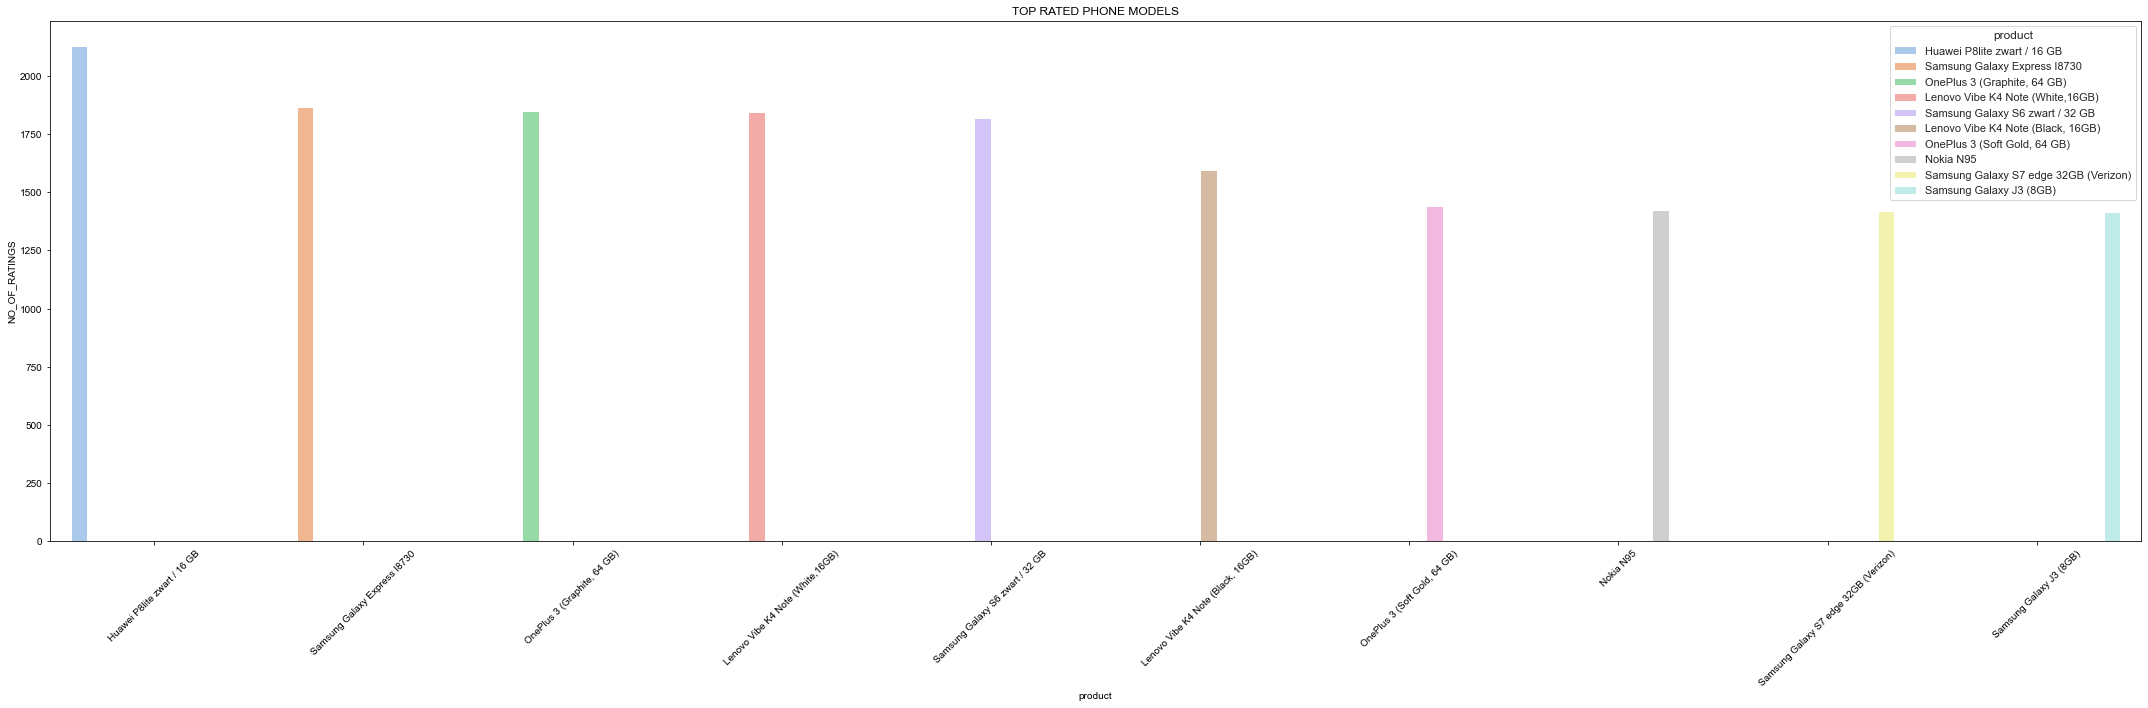

In [34]:
TOP_RATED = DF_COPY.head(10)

fig, ax = plt.subplots(figsize=(30,10))

sns.set_theme(style="whitegrid")

sns.barplot(data = TOP_RATED, x = "product", y = "NO_OF_RATINGS", hue = "product",palette = 'pastel')

plt.xticks(rotation=45)

plt.title("TOP RATED PHONE MODELS")

fig.tight_layout()

plt.show()

    * WE HAVE 10 PHONE MODELS WHICH ARE MOST RATED.
    
    * WE USED BAR PLOT TO PLOT THE MOST RATED MODELS

# B. Identify the users with most number of reviews.

In [35]:
# PRINT THE TOP 10 USERS WITH MOST NUMBER OF REVIEWS

print('TOP 10 USERS WITH MOST NUMBER OF REVIEWS:\n\n')
print(DF['author'].value_counts().head(10))

TOP 10 USERS WITH MOST NUMBER OF REVIEWS:


Amazon Customer    26400
Cliente Amazon     12166
e-bit               5202
Client d'Amazon     3863
Amazon Kunde        3601
Anonymous           2058
einer Kundin        1581
einem Kunden        1209
Anonymous           1077
unknown              924
Name: author, dtype: int64


In [36]:
DF_COPY = DF.copy()

DF_COPY['NO_OF_REVIEWS'] = DF_COPY.groupby('author')['author'].transform('count')

DF_COPY = DF_COPY.drop(columns = ['score','product'])

DF_COPY = DF_COPY.drop_duplicates()

DF_COPY = DF_COPY.sort_values(by=['NO_OF_REVIEWS'], ascending=False)

DF_COPY.reset_index(drop=True, inplace=True)

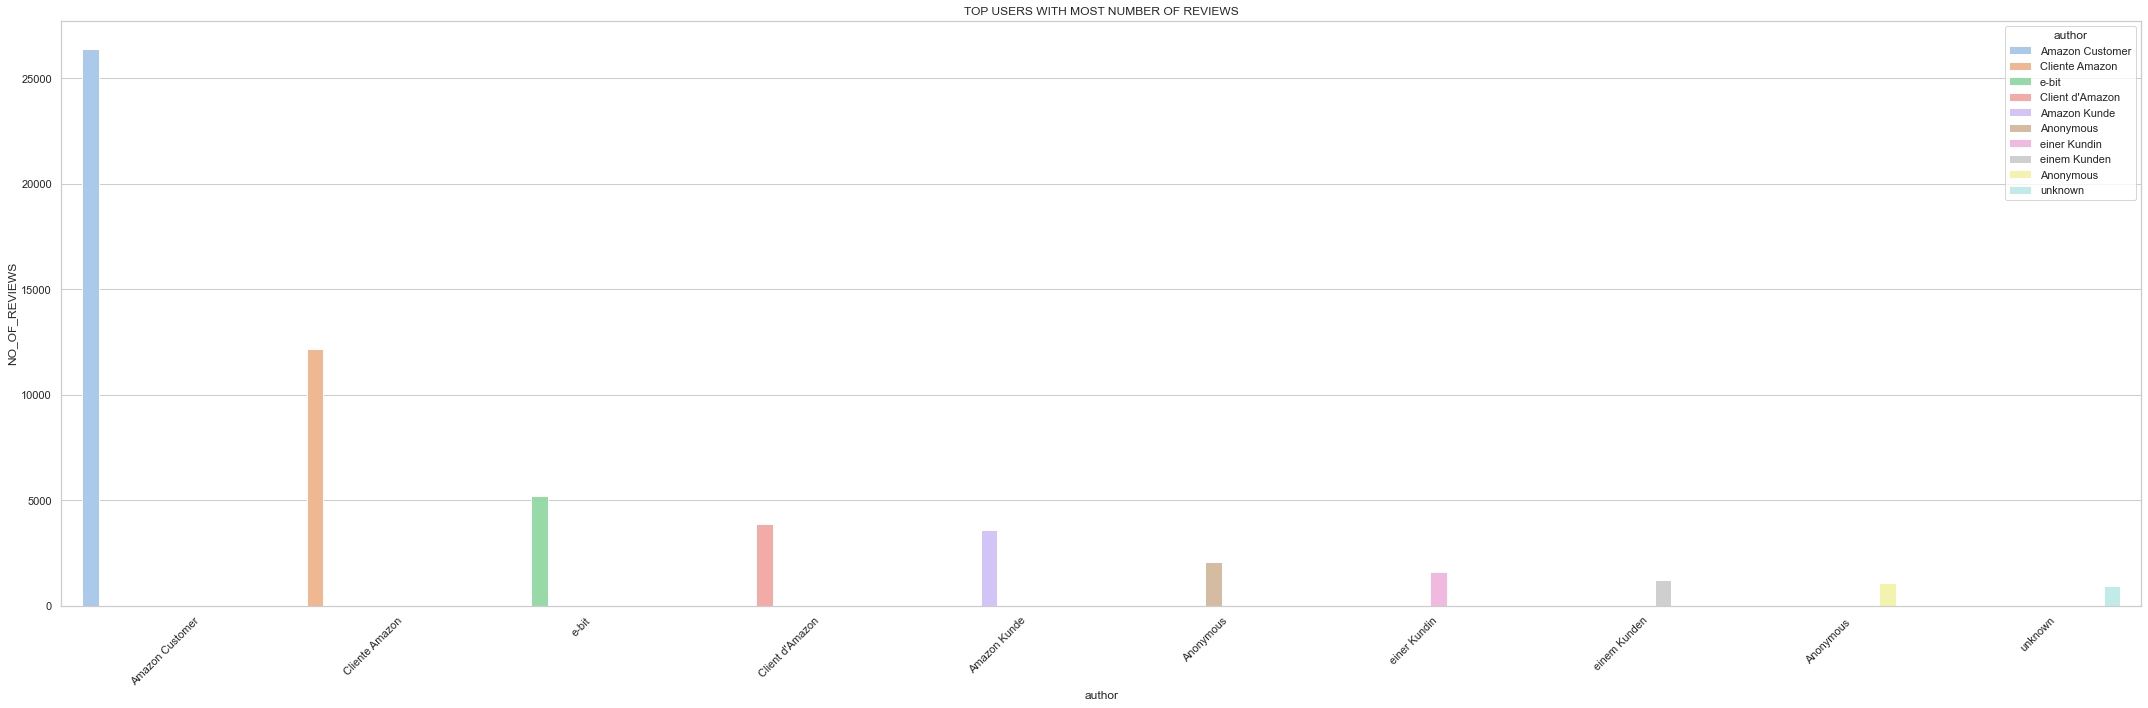

In [37]:
TOP_REVIEWERS = DF_COPY.head(10)

fig, ax = plt.subplots(figsize=(30,10))

sns.set_theme(style="whitegrid")

sns.barplot(data = TOP_REVIEWERS, x = "author", y = "NO_OF_REVIEWS", hue = "author",palette = 'pastel')

plt.xticks(rotation=45)

plt.title("TOP USERS WITH MOST NUMBER OF REVIEWS")

fig.tight_layout()

plt.show()

    * WE HAVE 10 USERS WHO GAVE MOST NUMBER OF REVIEWS.
    
    * WE USED BAR PLOT TO PLOT THE USERS WITH MOST NUMBER OF REVIEWS.

# C. Select the data with products having more than 50 ratings and users who have given more than 50 ratings. Report the shape of the final dataset.

In [38]:
# SELECT USERS THAT GAVE MORE THAN 50 RATINGS

USERS_50 = DF['author'].value_counts()

USERS_50 = USERS_50[USERS_50>50].index.tolist()

# SELECT PRODUCTS THAT HAVE MORE THAN 50 RATINGS

PRODUCTS_50 = DF['product'].value_counts()

PRODUCTS_50 = PRODUCTS_50[PRODUCTS_50>50].index.tolist()

# PRINT THE COUNT OF USERS AND PRODUCTS WITH MORE THAN 50 RATINGS

print('NO OF USERS WHO GAVE MORE THAN 50 RATINGS: ',len(USERS_50))

print('NO OF PRODUCTS HAVING MORE THAN 50 RATINGS: ',len(PRODUCTS_50))

NO OF USERS WHO GAVE MORE THAN 50 RATINGS:  691
NO OF PRODUCTS HAVING MORE THAN 50 RATINGS:  4503


In [39]:
# NOW SELECT THOSE RECORDS WHERE THE USERS GAVE MORE THAN 50 RATINS AND PRODUCTS HAVING MORE THAN 50 RATINGS.

USERS_PRODUCTS_50 = DF[(DF['author'].isin(USERS_50)) & (DF['product'].isin(PRODUCTS_50))]

# REPORT THE SHAPE OF DATA SET

print('NO OF ROWS AND COLUMNS WHERE USERS GAVE MORE THAN 50 RATINGS AND PRODUCTS HAVING MORE THAN 50 RATINGS:',
      '\n\nNO OF ROWS: ',USERS_PRODUCTS_50.shape[0],
      '\n\nNO OF COLUMNS: ',USERS_PRODUCTS_50.shape[1])

NO OF ROWS AND COLUMNS WHERE USERS GAVE MORE THAN 50 RATINGS AND PRODUCTS HAVING MORE THAN 50 RATINGS: 

NO OF ROWS:  73741 

NO OF COLUMNS:  3


In [41]:
USERS_PRODUCTS_50 = USERS_PRODUCTS_50.sort_values(by=['score'], ascending=False)

USERS_PRODUCTS_50.reset_index(drop=True, inplace=True)

print('TOP 10 PRODUCTS THAT HAVE MORE THAN 50 RATINGS GIVEN BY TOP AUTHORS THAT GAVE MORE THAN 50 RATINGS:\n')

print(USERS_PRODUCTS_50.head(10))

TOP 10 PRODUCTS THAT HAVE MORE THAN 50 RATINGS GIVEN BY TOP AUTHORS THAT GAVE MORE THAN 50 RATINGS:

            author                                            product  score
0  Amazon Customer            T-Mobile Sparq Prepaid Phone (T-Mobile)     10
1             Alan  Samsung S5 Mini SIM-Free Smartphone (EU Model,...     10
2  Amazon Customer  Samsung Note 4 Standard Li-ion Battery 3220mAh...     10
3   Cliente Amazon  Lenovo Motorola Moto G 4G 3 Generazione Smartp...     10
4            Irene                              BlackBerry Torch 9860     10
5            Terry  Samsung T245G Prepaid Phone With Double Minute...     10
6           Victor  BlackBerry Curve 8900 Javelin Unlocked Phone w...     10
7          Sabrina  Samsung Galaxy S3 mini I8190 Smartphone (10,2 ...     10
8   Cliente Amazon  Huawei P8 lite Smartphone, Display 5.0" IPS, D...     10
9             John  Nokia Lumia 521 T-Mobile GSM Windows 8 4G Nonc...     10


    * WE HAVE TOTAL OF 73741 RECORDS WHERE USERS GAVE MORE THAN 50 RATINGS AND PRODUCTS HAVING MORE THAN 50 RATINGS

# 3. Build a popularity based model and recommend top 5 mobile phones.

    . IN THE ABOVE QUESTION 2.C, WE HAVE SORTED THE DATA AS BELOW:
        . TOP USERS WHO GAVE MORE THAN 50 RATINGS AND
        . TOP PRODUCTS THAT HAVE MORE THAN 50 RATINGS
        
    . WE USE USERS_PRODUCTS_50 AND ORIGINAL DF DATA SET TO RECOMMEND A POPULARITY BASED MODEL WHICH HAS MORE REVIEWS
      AND HIGH SCORE.
    
    . WE CREATE A DATAFRAME OF POPULAR_MODELS WITH MEAN OF SCORE OF A MODEL.
    
    . A NEW FEATURE NO_OF_RATINGS IS ADDED TO THE DATA THAT GIVES NO. OF TIMES A TOP RATED PRODUCT IS GIVEN RATINGS.
    
    . SORT THE DATA SET IN DESCENDING ORDER FROM PRODUCTS HAVING HIGH MEAN SCORE AND MORE NO_OF_RATINGS
    
    . THIS WILL GIVE US A POPULAR PRODUCTS IN ORDER OF HAVING HIGH MEAN SCORE AND MORE NO_OF_RATINGS.

In [42]:
# USING ORIGINAL DATA SET AND RECOMMEND THE 5 POPULAR PHONE MODELS:

# GROUP THE PRODUCTS AND FIND THE MEAN OF THE SCORE FOR EACH GROUP

POPULAR_MODELS = pd.DataFrame(DF.groupby('product')['score'].mean())

# ADD NO_OF_RATINGS TO FIND NO. OF TIMES A POPULAR PRODUCT IS RATED

POPULAR_MODELS['NO_OF_RATINGS'] = DF.groupby('product')['score'].count()

# SORT IN ORDER OF PRODUCTS HAVING HIGH MEAN SCORE AND MORE NO_OF_RATINS

POPULAR_MODELS = POPULAR_MODELS.sort_values(by = ['score','NO_OF_RATINGS'], ascending = [False, False])

# PRINT THE TOP 5 MOBILE PHONES BASED ON THE POPULARITY

print('BELOW ARE THE TOP 5 PRODUCTS BASED ON POPULARITY:\n\n', POPULAR_MODELS.head())

BELOW ARE THE TOP 5 PRODUCTS BASED ON POPULARITY:

                                                     score  NO_OF_RATINGS
product                                                                 
Motorola Smartphone Motorola Moto G Dual Chip D...   10.0            140
Motorola Smartphone Motorola Moto X Desbloquead...   10.0            139
Nokia Smartphone Nokia Lumia 520 Desbloqueado O...   10.0            132
Samsung Smartphone Dual Chip Samsung Galaxy SII...   10.0            130
Samsung Smartphone Galaxy Win Duos Branco Desbl...   10.0            129


    * IN THE ABOVE OUTPUT WE HAVE 5 POPULAR MOBILE PHONES.
    
    * MOTO G AND MOTO X ARE IN TOP 2 WITH AVG SCORE OF 10 AND 140 AND 139 RATINGS RESPECTIVELY
    
    * NOKIA AND SAMSUNG PHONES ARE IN THE NEXT THREE SPOTS.
    
    * IN THE NEXT STEP, WE WILL USE THE USERS_PRODUCTS_50 TO RECOMMEND POPULAR MODELS

In [43]:
# USING PRODUCTS THAT ARE MOST RATED

# GROUP THE PRODUCTS AND FIND THE MEAN OF THE SCORE FOR EACH GROUP

POPULAR_MODELS = pd.DataFrame(USERS_PRODUCTS_50.groupby('product')['score'].mean())

# ADD NO_OF_RATINGS TO FIND NO. OF TIMES A POPULAR PRODUCT IS RATED

POPULAR_MODELS['NO_OF_RATINGS'] = USERS_PRODUCTS_50.groupby('product')['score'].count()

# SORT IN ORDER OF PRODUCTS HAVING HIGH MEAN SCORE AND MORE NO_OF_RATINS

POPULAR_MODELS = POPULAR_MODELS.sort_values(by = ['score','NO_OF_RATINGS'], ascending = [False, False])

# PRINT THE TOP 5 MOBILE PHONES BASED ON THE POPULARITY

print('BELOW ARE THE TOP 5 PRODUCTS BASED ON POPULARITY:\n\n', POPULAR_MODELS.head())

BELOW ARE THE TOP 5 PRODUCTS BASED ON POPULARITY:

                                                     score  NO_OF_RATINGS
product                                                                 
Asus ZenFone 2 Smartphone, 64 GB, Blu Fusion [I...   10.0             28
Samsung Galaxy Note5                                 10.0             28
HTC One (32Gb)                                       10.0             12
LG Electronics L90 Smartphone (4,7 Zoll (11,9 c...   10.0             11
Apple iPhone 6 Plus 64GB                             10.0             10


    * IN THE ABOVE OUTPUT WE HAVE 5 POPULAR MOBILE PHONES.
    
    * ASUS ZENFONE 2 AND SAMSUNG GALAXY NOTE 5 HAS HIGH SCORES OF 10 AND ARE MOST HIGH RATED
    
    * HTC ONE, LG L90, IPHONE 6 PLUS ARE IN THE ORDER WITH MEAN SCORE OF 10 BUT NO_OF_RATINGS IN ORDER OF 12, 11, 10

# 4. Build a collaborative filtering model using SVD. You can use SVD from surprise or build it from scratch(Note: Incase you’re building it from scratch you can limit your data points to 5000 samples if you face memory issues). Build a collaborative filtering model using kNNWithMeans from surprise. You can try both user-based and item-based model.

    * I AM USING USERS_PRODUCTS_50 DATA INSTEAD OF FULL DATA DF TO AVOID MEMORY ALLOCATION ISSUES IN KNNWITHMEANS

In [44]:
#USE THE READER FROM SURPRISE AND REARRANGE THE COLUMNS ACCORDINGLY

READER = Reader(rating_scale=(1, 10))

READER_DATA = Dataset.load_from_df(USERS_PRODUCTS_50[['author', 'product', 'score']], READER)

#HERE AUTHOR DATA IS CONVERTED INTO INNER ID'S.

In [45]:
#SPLIT THE DATA INTO TRAIN AND TEST IN 75:25 RATIO WITH RANDOM STATE = 612

TRAIN_DATA_SET, TEST_DATA = train_test_split(READER_DATA, test_size=.25,random_state=612)

TRAIN_DATA = READER_DATA.build_full_trainset()

In [46]:
# PRINT NUMBER OF USERS AND ITEMS IN TRAIN_DATA

print('NO OF USERS IN THE TRAIN DATA:',TRAIN_DATA.n_users)

print('\nNO OF ITEMS IN THE TRAIN DATA:',TRAIN_DATA.n_items)

NO OF USERS IN THE TRAIN DATA: 687

NO OF ITEMS IN THE TRAIN DATA: 4114


In [49]:
# CREATE A SVD MODEL WITH RANDOM STATE = 612

SVD_MOD = SVD(random_state=612)

# FIT THE TRAIN_DATA INTO SVD_MOD

SVD_MOD.fit(TRAIN_DATA)

# AFTER FIITING THE TRAIN_DATA, PREDICT THE TEST_DATA AND LOAD INTO SVD_PRED

SVD_PRED = SVD_MOD.test(TEST_DATA)

# PRINT THE FIRST 5 PREDICTIONS

print('FIRST 5 PREDICTIONS FROM SVD:\n',SVD_PRED[0:5])

FIRST 5 PREDICTIONS FROM SVD:
 [Prediction(uid='Mike', iid='Sim Free Apple iPhone 6s 64GB Mobile Phone - Space Grey', r_ui=10.0, est=9.82796255669638, details={'was_impossible': False}), Prediction(uid='Amazon Kunde', iid='Samsung Galaxy S5 mini Smartphone (4,5 Zoll (11,4 cm) Touch-Display, 16 GB Speicher, Android 4.4) gold', r_ui=6.0, est=1.5633714356048731, details={'was_impossible': False}), Prediction(uid='Christopher', iid='APPLE iPhone 7 Plus - Gold, 32 GB', r_ui=10.0, est=9.211214719108016, details={'was_impossible': False}), Prediction(uid='Cliente Amazon', iid='Microsoft Lumia 640 Smartphone, Dual-SIM, Display HD-IPS 5 Pollici, Processore Quad-Core 1,2GHz, Fotocamera 8 MP, Memoria 8GB, Win 8.1, Bianco [Germania]', r_ui=10.0, est=2.7287847019672906, details={'was_impossible': False}), Prediction(uid='Cliente Amazon', iid='Samsung Galaxy A5 2016 Smartphone LTE, 16GB, Nero', r_ui=10.0, est=2.4577010758102165, details={'was_impossible': False})]


In [50]:
RMSE_SVD = round(accuracy.rmse(SVD_PRED),2)

print('\nRMSE USING SVD MODEL:', RMSE_SVD)

RMSE: 3.6406

RMSE USING SVD MODEL: 3.64


In [53]:
# BUILD A COLLABARATIVE FILTERING MODEL USING KNN WITH MEANS

# DICT OF SIM OPTIONS - I AM USING COSINE SIMILARITY AND BUILDING THE MODEL BASED ON USER COLLABARATION WITH K = 100

SIM_OPTIONS = {'name': 'cosine', 'user_based': True}

KNN_MEANS_USER = KNNWithMeans(k = 100, sim_options = SIM_OPTIONS)

KNN_MEANS_USER.fit(TRAIN_DATA)

KNN_USERS_PRED = KNN_MEANS_USER.test(TEST_DATA)

# PRINT THE FIRST 5 PREDICTIONS

print('FIRST 5 PREDICTIONS FROM KNN WITH MEANS USING USER BASED COLLABARATION:\n',KNN_USERS_PRED[0:5])

Computing the cosine similarity matrix...
Done computing similarity matrix.
FIRST 5 PREDICTIONS FROM KNN WITH MEANS USING USER BASED COLLABARATION:
 [Prediction(uid='Mike', iid='Sim Free Apple iPhone 6s 64GB Mobile Phone - Space Grey', r_ui=10.0, est=10, details={'actual_k': 13, 'was_impossible': False}), Prediction(uid='Amazon Kunde', iid='Samsung Galaxy S5 mini Smartphone (4,5 Zoll (11,4 cm) Touch-Display, 16 GB Speicher, Android 4.4) gold', r_ui=6.0, est=6.786118006363303, details={'actual_k': 60, 'was_impossible': False}), Prediction(uid='Christopher', iid='APPLE iPhone 7 Plus - Gold, 32 GB', r_ui=10.0, est=8.802391232009366, details={'actual_k': 41, 'was_impossible': False}), Prediction(uid='Cliente Amazon', iid='Microsoft Lumia 640 Smartphone, Dual-SIM, Display HD-IPS 5 Pollici, Processore Quad-Core 1,2GHz, Fotocamera 8 MP, Memoria 8GB, Win 8.1, Bianco [Germania]', r_ui=10.0, est=8.58675531341991, details={'actual_k': 58, 'was_impossible': False}), Prediction(uid='Cliente Amazon'

In [52]:
# BUILD A ITEM - ITEM COLLABARATIVE FILTERING MODEL USING KNN WITH MEANS

# DICT OF SIM OPTIONS - I AM USING COSINE SIMILARITY AND BUILDING THE MODEL BASED ON ITEMS COLLABARATION WITH K = 100

SIM_OPTIONS = {'name': 'cosine', 'user_based': False}

KNN_MEANS_ITEM = KNNWithMeans(k = 100, sim_options = SIM_OPTIONS)

KNN_MEANS_ITEM.fit(TRAIN_DATA)

KNN_ITEMS_PRED = KNN_MEANS_ITEM.test(TEST_DATA)

# PRINT THE FIRST 5 PREDICTIONS

print('FIRST 5 PREDICTIONS FROM KNN WITH MEANS USING ITEMS BASED COLLABARATION:\n',KNN_ITEMS_PRED[0:5])

Computing the cosine similarity matrix...
Done computing similarity matrix.
FIRST 5 PREDICTIONS FROM KNN WITH MEANS USING ITEMS BASED COLLABARATION:
 [Prediction(uid='Mike', iid='Sim Free Apple iPhone 6s 64GB Mobile Phone - Space Grey', r_ui=10.0, est=10, details={'actual_k': 100, 'was_impossible': False}), Prediction(uid='Amazon Kunde', iid='Samsung Galaxy S5 mini Smartphone (4,5 Zoll (11,4 cm) Touch-Display, 16 GB Speicher, Android 4.4) gold', r_ui=6.0, est=7.774711003620274, details={'actual_k': 100, 'was_impossible': False}), Prediction(uid='Christopher', iid='APPLE iPhone 7 Plus - Gold, 32 GB', r_ui=10.0, est=9.118399727611239, details={'actual_k': 49, 'was_impossible': False}), Prediction(uid='Cliente Amazon', iid='Microsoft Lumia 640 Smartphone, Dual-SIM, Display HD-IPS 5 Pollici, Processore Quad-Core 1,2GHz, Fotocamera 8 MP, Memoria 8GB, Win 8.1, Bianco [Germania]', r_ui=10.0, est=9.138223103117735, details={'actual_k': 100, 'was_impossible': False}), Prediction(uid='Cliente Am

In [54]:
RMSE_USER_BASED = round(accuracy.rmse(KNN_USERS_PRED),2)

RMSE_ITEM_BASED = round(accuracy.rmse(KNN_ITEMS_PRED),2)

print('RMSE VALUE FOR USER BASED COLLABARATIVE MODEL USING KNN MEANS:', RMSE_USER_BASED)

print('\nRMSE VALUE FOR ITEM BASED COLLABARATIVE MODEL USING KNN MEANS:', RMSE_ITEM_BASED)

RMSE: 2.3845
RMSE: 2.4091
RMSE VALUE FOR USER BASED COLLABARATIVE MODEL USING KNN MEANS: 2.38

RMSE VALUE FOR ITEM BASED COLLABARATIVE MODEL USING KNN MEANS: 2.41


# 5. Evaluate the collaborative model. Print RMSE value.

In [55]:
SVD_CV = cross_validate(SVD_MOD, READER_DATA, measures=['RMSE'], cv = 5, verbose=False)

KNN_ITEM_CV = cross_validate(KNN_MEANS_ITEM, READER_DATA, measures=['RMSE'], cv = 5, verbose=False)

KNN_USER_CV = cross_validate(KNN_MEANS_USER, READER_DATA, measures=['RMSE'], cv = 5, verbose=False)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.


In [56]:
SVD_CV_SCORE = round((SVD_CV['test_rmse'].mean()),2)
KNN_ITEM_CV_SCORE = round((KNN_ITEM_CV['test_rmse'].mean()),2)
KNN_USER_CV_SCORE = round((KNN_USER_CV['test_rmse'].mean()),2)

print("CROSS VALIDATION SCORE FOR THE SVD MODEL: ",SVD_CV_SCORE)

print("\nCROSS VALIDATION SCORE FOR THE KNN MEANS WITH ITEMS: ",KNN_ITEM_CV_SCORE)

print("\nCROSS VALIDATION SCORE FOR THE KNN MEANS WITH USERS: ",KNN_USER_CV_SCORE)

CROSS VALIDATION SCORE FOR THE SVD MODEL:  2.63

CROSS VALIDATION SCORE FOR THE KNN MEANS WITH ITEMS:  2.61

CROSS VALIDATION SCORE FOR THE KNN MEANS WITH USERS:  2.59


In [57]:
print('\nRMSE USING SVD MODEL:', RMSE_SVD)

print('\nRMSE VALUE FOR USER BASED COLLABARATIVE MODEL USING KNN MEANS:', RMSE_USER_BASED)

print('\nRMSE VALUE FOR ITEM BASED COLLABARATIVE MODEL USING KNN MEANS:', RMSE_ITEM_BASED)


RMSE USING SVD MODEL: 3.64

RMSE VALUE FOR USER BASED COLLABARATIVE MODEL USING KNN MEANS: 2.38

RMSE VALUE FOR ITEM BASED COLLABARATIVE MODEL USING KNN MEANS: 2.41


In [58]:
RMSE = pd.DataFrame()

RMSE = RMSE.append(pd.Series(["SVD_MODEL", RMSE_SVD, SVD_CV_SCORE]),ignore_index=True)

RMSE = RMSE.append(pd.Series(["KNNMEANS WITH USER BASED", RMSE_USER_BASED, KNN_ITEM_CV_SCORE]),ignore_index=True)

RMSE = RMSE.append(pd.Series(["KNNMEANS WITH ITEM BASED", RMSE_ITEM_BASED, KNN_USER_CV_SCORE]),ignore_index=True)

RMSE.columns = ["MODEL NAME", "RMSE VALUE", "CROSS VALIDATION SCORE"]

RMSE

,MODEL NAME,RMSE VALUE,CROSS VALIDATION SCORE
0,SVD_MODEL,3.64,2.63
1,KNNMEANS WITH USER BASED,2.38,2.61
2,KNNMEANS WITH ITEM BASED,2.41,2.59


    * RMSE VALUE FOR KNN MEANS WITH USERS IS LESS COMPARED TO SVD AND KNN WITH ITEM BASED MODELS
    
    * LESS RMSE VALUE INDICATES THAT THE MODEL IS MORE EFFECTIVE

# 6. Predict score (average rating) for test users.

    * WE HAVE USED SVD, KNNWITHMEANS USING ITEMS AS WELL AS USERS COLLABARATION MODEL.
    
    * USING THE DATA FROM PREDICTIONS ON ALL THE THREE MODELS, WE WILL CREATE 3 DATA FRAMES.

In [59]:
# SVD_PRED[1]

# KNN_USERS_PRED[1]

KNN_ITEMS_PRED[1]

Prediction(uid='Amazon Kunde', iid='Samsung Galaxy S5 mini Smartphone (4,5 Zoll (11,4 cm) Touch-Display, 16 GB Speicher, Android 4.4) gold', r_ui=6.0, est=7.774711003620274, details={'actual_k': 100, 'was_impossible': False})

    * FROM THE ABOVE OUTPUT, WE HAVE UID, IID, R_UI, EST, DETAILS FIELDS FOR EACH PREDICTIONS.
    
    * LET US CREATE A DATAFRAME USING THE FIELDS AND DATA IN THE PREDICTIONS LIST
    
    * R_UI FIELD REPRESENTS THE RATING OF A PRODUCT GIVEN BY THE USER.
    
    * EST REPRESENTS THE PREDICTION VALUE OF A PRODUCT
    
    * AFTER CREATING DATA FRAME, MEAN OF R_UI AND EST WILL GIVE AVERAGE RATING AND PREDICTION SCORE FOR TEST DATA

In [60]:
PREDICTIONS_SVD_DF = pd.DataFrame(SVD_PRED, columns = ['USER_ID', 'ITEM_ID', 'RATING', 'PREDICTION', 'DETAILS' ])

PREDICTIONS_KNN_USERS_DF = pd.DataFrame(KNN_USERS_PRED, 
                                        columns = ['USER_ID', 'ITEM_ID', 'RATING', 'PREDICTION', 'DETAILS' ])

PREDICTIONS_KNN_ITEMS_DF = pd.DataFrame(KNN_ITEMS_PRED, 
                                        columns = ['USER_ID', 'ITEM_ID', 'RATING', 'PREDICTION', 'DETAILS' ])

# PREDICTIONS_SVD_DF.head()

# PREDICTIONS_KNN_USERS_DF.head()

PREDICTIONS_KNN_ITEMS_DF.head()

,USER_ID,ITEM_ID,RATING,PREDICTION,DETAILS
0,Mike,Sim Free Apple iPhone 6s 64GB Mobile Phone - S...,10.0,10.000000,"{'actual_k': 100, 'was_impossible': False}"
1,Amazon Kunde,"Samsung Galaxy S5 mini Smartphone (4,5 Zoll (1...",6.0,7.774711,"{'actual_k': 100, 'was_impossible': False}"
2,Christopher,"APPLE iPhone 7 Plus - Gold, 32 GB",10.0,9.118400,"{'actual_k': 49, 'was_impossible': False}"
3,Cliente Amazon,"Microsoft Lumia 640 Smartphone, Dual-SIM, Disp...",10.0,9.138223,"{'actual_k': 100, 'was_impossible': False}"
4,Cliente Amazon,"Samsung Galaxy A5 2016 Smartphone LTE, 16GB, Nero",10.0,9.376181,"{'actual_k': 100, 'was_impossible': False}"


In [61]:
AVERAGE_RATING_SVD = round(PREDICTIONS_SVD_DF['RATING'].mean(),2)

AVERAGE_PREDICTION_SCORE_SVD = round(PREDICTIONS_SVD_DF['PREDICTION'].mean(),2)

AVERAGE_RATING_KNN_USERS = round(PREDICTIONS_KNN_USERS_DF['RATING'].mean(),2)

AVERAGE_PREDICTION_SCORE_KNN_USERS = round(PREDICTIONS_KNN_USERS_DF['PREDICTION'].mean(),2)

AVERAGE_RATING_KNN_ITEMS = round(PREDICTIONS_KNN_ITEMS_DF['RATING'].mean(),2)

AVERAGE_PREDICTION_SCORE_KNN_ITEMS = round(PREDICTIONS_KNN_ITEMS_DF['PREDICTION'].mean(),2)

AVERAGE_RATINGS = pd.DataFrame()

AVERAGE_RATINGS = AVERAGE_RATINGS.append(pd.Series(["SVD_MODEL", AVERAGE_RATING_SVD, 
                                                    AVERAGE_PREDICTION_SCORE_SVD]),ignore_index=True)

AVERAGE_RATINGS = AVERAGE_RATINGS.append(pd.Series(["KNNMEANS WITH USER BASED", AVERAGE_RATING_KNN_USERS, 
                                                    AVERAGE_PREDICTION_SCORE_KNN_USERS]),ignore_index=True)

AVERAGE_RATINGS = AVERAGE_RATINGS.append(pd.Series(["KNNMEANS WITH ITEM BASED", AVERAGE_RATING_KNN_ITEMS, 
                                                    AVERAGE_PREDICTION_SCORE_KNN_ITEMS]),ignore_index=True)

AVERAGE_RATINGS.columns = ["MODEL NAME", "AVERAGE_RATINGS", "AVERAGE PREDICTION SCORE"]

print('AVERAGE RATING FOR TEST USERS USING SVD MODEL:', AVERAGE_RATING_SVD)

print('\nAVERAGE PREDICTION SCORE FOR TEST USERS USING SVD MODEL:', AVERAGE_PREDICTION_SCORE_SVD)

print('\nAVERAGE RATING FOR TEST USERS USING KNN MEANS WITH USERS:', AVERAGE_RATING_KNN_USERS)

print('\nAVERAGE PREDICTION SCORE FOR TEST USERS USING KNN MEANS WITH USERS:', AVERAGE_PREDICTION_SCORE_KNN_USERS)

print('\nAVERAGE RATING FOR TEST USERS USING KNN MEANS WITH ITEMS:', AVERAGE_RATING_KNN_ITEMS)

print('\nAVERAGE PREDICTION SCORE FOR TEST USERS USING KNN MEANS WITH ITEMS:', AVERAGE_PREDICTION_SCORE_KNN_ITEMS)

AVERAGE RATING FOR TEST USERS USING SVD MODEL: 7.97

AVERAGE PREDICTION SCORE FOR TEST USERS USING SVD MODEL: 5.91

AVERAGE RATING FOR TEST USERS USING KNN MEANS WITH USERS: 7.97

AVERAGE PREDICTION SCORE FOR TEST USERS USING KNN MEANS WITH USERS: 8.04

AVERAGE RATING FOR TEST USERS USING KNN MEANS WITH ITEMS: 7.97

AVERAGE PREDICTION SCORE FOR TEST USERS USING KNN MEANS WITH ITEMS: 8.25


    * AVERAGE RATING FOR TEST USERS IN ALL THE MODELS IS 7.97
    
    * AVERAGE PREDICTION SCORE FOR TEST USERS IS HIGH FOR KNN MEANS WITH ITEMS AND LOW FOR KNN MEANS WITH USERS

# 7. Report your findings and inferences.

In [62]:
print('RMSE AND CV SCORE FOR THE COLLABARATION MODELS:\n')

print(RMSE)

print('\n\n')

print('AVERAGE RATINGS AND PREDICTION SCORE FOR THE COLLABARATION MODELS:\n')

print(AVERAGE_RATINGS)

RMSE AND CV SCORE FOR THE COLLABARATION MODELS:

                 MODEL NAME  RMSE VALUE  CROSS VALIDATION SCORE
0                 SVD_MODEL        3.64                    2.63
1  KNNMEANS WITH USER BASED        2.38                    2.61
2  KNNMEANS WITH ITEM BASED        2.41                    2.59



AVERAGE RATINGS AND PREDICTION SCORE FOR THE COLLABARATION MODELS:

                 MODEL NAME  AVERAGE_RATINGS  AVERAGE PREDICTION SCORE
0                 SVD_MODEL             7.97                      5.91
1  KNNMEANS WITH USER BASED             7.97                      8.04
2  KNNMEANS WITH ITEM BASED             7.97                      8.25


    * WE HAVE A TWO POPULAR PHONE BASED ON OVERALL USERS AND MOST POPULAR USERS
    
    * AMONG ALL THE USERS, MOTOROLA SMARTPHONE MOTOROLA MOTO G DUAL CHIP IS THE MOST POPULAR PHONE.
    * IT HAS AVERAGE RATING OF 10 WITH 140 RATINGS.
    
    * AMONG THE POPULAR USERS, ASUS ZENFONE 2 SMARTPHONE,64 GB, BLU FUSION IS THE MOST POPULAR PHONE.
    * IT HAS AVERAGE RATING OF 10 WITH 28 MOST POPULAR USERS.
    
    * AMAZON CUSTOMERS ARE AMONG THE MOST USERS THAT HAVE REVIEWED THE PHONE MODELS.
    
    * RMSE VALUE IS LOW FOR KNN WITH USER BASED AND KNN WITH ITEM BASED IS SLIGHTLY HIGH, WHERE AS SVD MODEL IS 
      HAVING HIGH RMSE VALUE.
      
    * AVERAGE RATINGS ACROSS ALL THE MODELS IS SIMILAR TO 7.97.
    
    * AVERAGE PREDICTION IS HIGH FOR KNN MEANS WITH ITEMS AND LOW FOR SVD AND KNN WITH USER BASED LIES IN MIDDLE.

# 8. Try and recommend top 5 products for test users.

    * LET US TAKE ANY DATA FRAME CREATED OUT OF PREDICTIONS FROM SVD AND KNN WITH USERS AND ITEMS.
    
    * SORT THE DATA USING USER_ID AND RATING THAT GIVES PRODUCTS FOR THE TEST USERS BASED ON THE TOP RATINGS 
      IN DESCENDING ORDER AND THEN GROUP BY USING USER ID AND TAKE ONLY TOP 5 ROWS OF SORTED DATA FOR USER
      
    * OUR DATA FRAME CONTAINS TOP 5 RECOMMENDATIONS FOR EACH USER AS WE ARE TAKING ONLY HEAD(5) WHICH ARE PRODUCTS
      WITH HIGH RATINGS RECOMMENDED TO A USER.

In [63]:
# TOP_5_PREDICTIONS DATA FRAME CONTAINS TOP 5 RECOMMENDATIONS FOR ALL THE USERS IN THE TEST DATA

TOP_5_PREDICTIONS = PREDICTIONS_SVD_DF.sort_values(['USER_ID','RATING'],ascending=False).groupby('USER_ID').head(5)

TOP_5_PREDICTIONS = TOP_5_PREDICTIONS.sort_values(['USER_ID'],ascending=True)

TOP_5_PREDICTIONS = TOP_5_PREDICTIONS.drop(columns = ['PREDICTION', 'DETAILS'])

print(TOP_5_PREDICTIONS)

            USER_ID                                            ITEM_ID  RATING
7171              #                              Samsung GT-S5230 Star    10.0
1257              #                                          Nokia N97    10.0
6784              #                                Apple iPhone 4 16Gb    10.0
6475              #                                         Nokia 5230    10.0
2013              #                              Apple iPhone 3GS 16Gb    10.0
...             ...                                                ...     ...
10107  Ð°Ð½Ð´ÑÐµÐ¹                      Nokia 5230 Navigation Edition    10.0
3887   Ð°Ð½Ð´ÑÐµÐ¹               Sony Xperia M (ÑÐ¸Ð¾Ð»ÐµÑÐ¾Ð²ÑÐ¹)    10.0
1519   Ð°Ð½Ð´ÑÐµÐ¹                       Sony Xperia L (ÑÐµÑÐ½ÑÐ¹)    10.0
885    Ð°Ð½Ð´ÑÐµÐ¹                  Sony Xperia Z1 Compact (Ð»Ð°Ð¹Ð¼)    10.0
822    Ð°Ð½Ð´ÑÐµÐ¹  Samsung Galaxy S4 mini Duos GT-I9192 (ÑÐµÑÐ½...    10.0

[3240 rows x 3 columns]


    * SELECT A RANDOM USERS LIST AND PRINT THE TOP 5 RECOMMENDATIONS OF THAT TEST USERS.

In [544]:
# RANDOMLY PRINT THE 5 RECOMMENDATIONS FOR DIFFERENT USERS

RANDOM_USERS = ['Amazon Customer','Barbara','Christine','Daniel','Emma','Ganesh','Heather','Jennifer','Klaus'
                'Laura','Michelle','Oliver','Pasquale','Rebecca','Samantha','Tommaso','Valentina','Wolfgang']

for i in np.arange(0,len(RANDOM_USERS),1):
    USER = RANDOM_USERS[i]
    print('\nTOP 5 PREDICTIONS FOR USER ',RANDOM_USERS[i],'\n',TOP_5_PREDICTIONS[TOP_5_PREDICTIONS['USER_ID'] == USER],'\n')


TOP 5 PREDICTIONS FOR USER  Amazon Customer 
             USER_ID                                            ITEM_ID  RATING
9   Amazon Customer  Samsung Galaxy Light Smartphone SGH-T399 - Bro...    10.0
14  Amazon Customer  Samsung Galaxy J5 SM-J500M/DS Factory Unlocked...    10.0
40  Amazon Customer  Motorola RAZR V3 Unlocked GSM Phone with Camer...    10.0
38  Amazon Customer  Samsung Galaxy S5 G900V Verizon 4G LTE Smartph...    10.0
25  Amazon Customer  Samsung Galaxy J7 (New 2016 Edition) (White, 1...    10.0 


TOP 5 PREDICTIONS FOR USER  Barbara 
       USER_ID                                            ITEM_ID  RATING
7959  Barbara  LG Electronics Nexus 5X 32 GB UK SIM-Free Andr...    10.0
5518  Barbara  Samsung Galaxy Ace S5830 Smartphone (8,9 cm (3...    10.0
2354  Barbara  Apple Computer iPhone 3G Smartphone (8,9 cm (3...    10.0
1042  Barbara  Sony Xperia Z2 Smartphone (5,2 Zoll (13,2 cm) ...    10.0
8003  Barbara  Samsung Galaxy Ace S5830 Smartphone (8,9 cm (3...    10.0 

    * WE HAVE RANDOMLY SELECTED 17 CUSTOMERS AND PRINTED THE TOP 5  RECOMMENDATIONS FOR THE THEM IN TEST DATA
    
    * TOP_5_PREDICTIONS DATA FRAME CONTAINS TOP 5 RECOMMENDATIONS FOR EACH USER IN TEST DATA.

# 9. Try other techniques (Example: cross validation) to get better results.

In [64]:
SVD_CV = cross_validate(SVD_MOD, READER_DATA, measures=['RMSE'], cv = 5, verbose=False)

KNN_ITEM_CV = cross_validate(KNN_MEANS_ITEM, READER_DATA, measures=['RMSE'], cv = 5, verbose=False)

KNN_USER_CV = cross_validate(KNN_MEANS_USER, READER_DATA, measures=['RMSE'], cv = 5, verbose=False)

SVD_CV_SCORE = round((SVD_CV['test_rmse'].mean()),2)

KNN_ITEM_CV_SCORE = round((KNN_ITEM_CV['test_rmse'].mean()),2)

KNN_USER_CV_SCORE = round((KNN_USER_CV['test_rmse'].mean()),2)

print("CROSS VALIDATION SCORE FOR THE SVD MODEL: ",SVD_CV_SCORE)

print("\nCROSS VALIDATION SCORE FOR THE KNN MEANS WITH ITEMS: ",KNN_ITEM_CV_SCORE)

print("\nCROSS VALIDATION SCORE FOR THE KNN MEANS WITH USERS: ",KNN_USER_CV_SCORE)

RMSE = pd.DataFrame()

RMSE = RMSE.append(pd.Series(["SVD_MODEL", RMSE_SVD, SVD_CV_SCORE]),ignore_index=True)

RMSE = RMSE.append(pd.Series(["KNNMEANS WITH USER BASED", RMSE_USER_BASED, KNN_ITEM_CV_SCORE]),ignore_index=True)

RMSE = RMSE.append(pd.Series(["KNNMEANS WITH ITEM BASED", RMSE_ITEM_BASED, KNN_USER_CV_SCORE]),ignore_index=True)

RMSE.columns = ["MODEL NAME", "RMSE VALUE", "CROSS VALIDATION SCORE"]

print(RMSE)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
CROSS VALIDATION SCORE FOR THE SVD MODEL:  2.62

CROSS VALIDATION SCORE FOR THE KNN MEANS WITH ITEMS:  2.61

CROSS VALIDATION SCORE FOR THE KNN MEANS WITH USERS:  2.6
                 MODEL NAME  RMSE VALUE  CROSS VALIDATION SCORE
0        

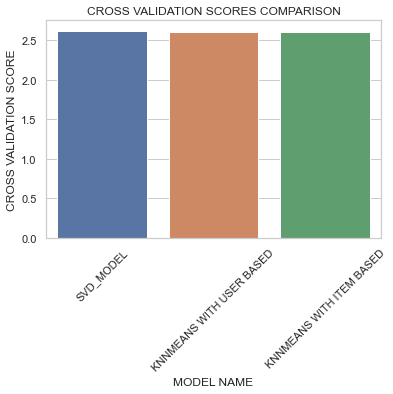

In [65]:
sns.barplot(x = "MODEL NAME", y = "CROSS VALIDATION SCORE", data = RMSE)

plt.xticks(rotation=45)

plt.title("CROSS VALIDATION SCORES COMPARISON")

fig.tight_layout()

plt.show()

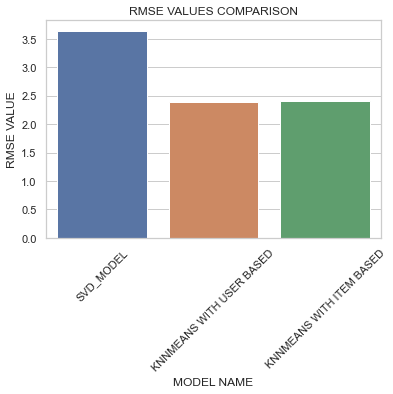

In [66]:
sns.barplot(x = "MODEL NAME", y = "RMSE VALUE", data = RMSE)

plt.xticks(rotation=45)

plt.title("RMSE VALUES COMPARISON")

fig.tight_layout()

plt.show()

# 10. In what business scenario you should use popularity based Recommendation Systems ?

    1. WHAT IS POPULARITY BASED RECOMMENDATION SYSTEMS?
        * THIS IS A RECOMMENDATION SYSTEMS BASED ON POPULARITY. IN SIMPLE WORDS, WE GET A RECOMMEMDATION OF ANY THING
          THAT IS CURRENTLY IN TREND OR A PRODUCT THAT IS MOST POPULAR AMONG OTHER PRODUCTS.
          
    2. IN WHICH BUSINESS SCENARIO WE USE POPULARITY BASED RECOMMENDATION SYSTEMS?
        * LET US CONSIDER A CLOTH STORE WHERE THERE ARE CERTAIN CLOTH STYLES ARE PURCHASED BY MOST OF THE CUSTOMERS.
        * HERE THE SHOP KEEPER CAN SHOWCASE THOSE MOST SELLING STYLING OUT FITS IN FRONT ROW SAYING "MOST SELLING"
        * WE ARE NOT CONSIDERING THE CATEGORY OF CUSTOMERS OR PRODUCTS HERE, WE ARE SEEING THAT CERTAIN CLOTH STYLES
          ARE MOST SELLING AND WANT TO RECOMMEND TO THE CUSTOMERS VISITING THE SHOWROOM.
          
        * ANOTHER SCENARIO IS RECOMMENDATION MOST WATCHED SHOWS IN STREAMING APP.
        * HERE WE CAN SEE THAT THE APP RECOMMENDS SOME SHOWS BASED ON RATINGS THEY RECIEVED AMONG MANY USERS.
        
        * AN E-COMMERCE WEBSITE RECOMMDING THE MOST SELLING PHONES/ELECTRONIC GOODS AND OTHER PRODUCTS TO THE CUSTOMER.
        
    * POPULARITY BASED RECOMMENDATION SYSTEMS DOES HELPS IN RECOMMENDING THE MOST POPULAR ITEMS/ MOVIES ETC., TO THE
      CUSTOMERS ASSUMING THAT SINCE THE PRODUCT IS POPULAR AND IN TRENDING, THE CHANCES OF NEW CUSTOMERS CONSIDERING
      THE PRODUCT ARE HIGH SINCE MOST OF USERS WILL HAVE A LOOK INTO MOST TRENIDNG PRODUCT.

# 11. In what business scenario you should use CF based Recommendation Systems ?

    * COLLABORATIVE FILTERING BASED RECOMMENDATION SYSTEM:
    
        * IN POPULARITY BASED RECOMMENDATION SYSTEMS, WE ARE NOT CONSIDERING THE USERS TASTES AND JUST RECOMMENDS THE 
          TRENDING PRODUCTS. IN THIS ASSUMPTION, CUSTOMERS HAVE DIFFERENT TASTES AND BIASED TO DIFFERENT THEMES.WITHOUT
          UNDERSTANDING THE USER TASTES, RECOMMENDING THE PRODUCTS MAY HAVE THE USERS LOOK INTO OTHER AREA FOR THE 
          PRODUCTS OF HIS TASTE.
          
        * IN THIS SCENARIO, WE CAN USE COLLABORATIVE FILTERING BASED RECOMMENDATION SYSTEMS WHICH AGAIN DIVIDED INTO
          USER BASED AND ITEMS BASED FILTERING. IN USER BASED, RECOMMENDATIONS TO USER A IS GIVEN BASED ON THE LIKES
          OF SIMILAR USERS LIKE HIM. IN ITEM BASED, RECOMMENDATIONS ARE BASED ON SIMILARITIES BETWEEN THE ITEMS SUCH
          A WAY THAT IF USER A LIKES ITEM B AND ITEM C IS SIMILAR TO ITEM B, THEN ITEM C IS RECOMMENDED TO USER A.
          
    * BUSINESS SCENARIOS WHERE CF BASED RECOMMENDATION SYSTEMS ARE USED:
    
        * CONSIDER A E-COMMERCE SITE WHERE I HAVE CREATED A PROFILE AND MADE SOME PURCHASES IN THE SITE.
        
        * IN USER BASED FILTERING, THE SITE MAY LOOK FOR THE USERS WHO HAS SAME BEHAVIOUR /TASTES AS ME WHERE THE OTHER
          USERS HAS PURCHASED SOME ITEMS. THEN THE SITE MAY RECOMMEND ME THOSE PRODUCTS THAT ARE CONSIDERED BY OTHER 
          SIMILAR USERS LIKE ME.
          
        * IN ITEM BASED FILTERING, LET US CONSIDER I HAVE PURCHASED/ SEARCHING FOR SOME ITEMS, THEN THE SITE MAY LOOK
          FOR PRODUCTS THAT ARE SIMILAR TO PRODUCTS I AM LOOKING FOR AND RECOMMEND THOSE PRODUCTS TO ME.
          
        * CONSIDER ANOTHER SIMPLE SCENARIO IN BANKING INDUSTRY. WE HAVE DIFFERENT CATEGORIES OF CUSTOMERS THAT AVAIL
          DIFFERENT SERVICES. CONSIDER A USER CATEGORY WHERE USERS THOSE HAVING MORE MONEY DEPOSITED TENDS TO MAINTAIN
          A DEPOSIT ACCOUNT THAT FETCHES HIGH INTEREST. 
          
              * IN USER BASED FILTERING, IF I AM A USER WHO IS HAVING MORE DEPOSITS THEN THE BANK MAY RECOMMEND ME TO
                MAINTAING A DEPOSIT ACCOUNT WHICH GIVES HIGH INTEREST THAN IN MY SAVINGS ACCOUNT AS MORE USERS LIKE ME
                TENDS TO DO THE SAME.
              
              * IN ITEM BASED FILTERING, IF AM A USER WHO IS LOOKING TO MAINTAIN A TERM DEPOSIT WHICH GIVES ME HIGHER
                INTEREST, THEN THE BANK MAY RECOMMEND ME OTHER DEPOSIT OPTIONS THAT FETCHES ME HIGHER INTEREST RATES
                SIMILAR TO TERM DEPOSITS LIKE ONE TIME INVESTMENT IN STOCKS / MUTUAL FUNDS / ULIPs ETC.

# 12. What other possible methods can you think of which can further improve the recommendation for different users ?

In [67]:
print(BACKUP_DF.columns)

Index(['phone_url', 'date', 'lang', 'country', 'source', 'domain', 'score',
       'score_max', 'extract', 'author', 'product'],
      dtype='object')


    * OTHER THAN AUTHOR, PRODUCT AND SCORE WE HAVE OTHER COLUMNS IN THE ORIGINAL DATASET.
    
    * AMONG OTHER COLUMNS, DATE, LANGUAGE, COUNTRY AND DOMAIN MIGHT BE OTHER FEATURES THAT CAN AFFECT THE 
      RECOMMENDATIONS FOR THE USER.
      
    * HYBRID RECOMMENDATION SYSTEM IS ONE SUCH METHOD THAT CAN FUTHER IMPROVE THE RECOMMENDATIONS.
    
    * USING HYBRID APPROACH LIKE CONTENT + COLLABARATIVE RECOMMENDATION SYSTEMS IMPROVES THE RECOMMENDATIONS TO USERS.
        * USING USER FEATURES + ITEM RATINGS GIVEN BY USERS CAN IMPROVE RECOMMENDATIONS TO USERS.
        
        * USING DEMOGRAPHIC IMFORMATION OF USERS CAN BE USED TO RECOMMEND THE PRODUCTS BASED ON USER DEMOGRAPHIC
          IMFORMATION. IN THIS APPROACH WE DO NOT NEED TO HAVE USER RATINGS OR ITEM INFORMATION AND USED TO OVERCOME
          COLD START ISSUES.

            ************** END OF RECOMMENDATION SYSTEMS PROBLEM STATEMENT SOLUTION **************